In [1]:
### Install Qiskit and relevant packages, if needed
### IMPORTANT: Make sure you are using python 3.10 or 3.11 for compatibility of the required packages
%pip install qiskit[visualization]==1.0.2
%pip install qiskit-ibm-runtime
%pip install qiskit-aer
%pip install graphviz
%pip install qiskit-transpiler-service
%pip install git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 8.4 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=9762318207672bde79ba08ad7fbd19f3f9fc682bd9d8c1a420c31216416a024f
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [2]:
%set_env QXToken=b6ce976ae34fa83441518b4fb705a4eba366b0f8b8e467e597516d02bec32aaafb8d2505e4d297c080b070cc52194bceb5d95df1fa8ebcb9b99b2a8ffdc3ab84

env: QXToken=b6ce976ae34fa83441518b4fb705a4eba366b0f8b8e467e597516d02bec32aaafb8d2505e4d297c080b070cc52194bceb5d95df1fa8ebcb9b99b2a8ffdc3ab84


In [3]:
# qc-grader should be 0.18.10 (or higher)
import qc_grader

qc_grader.__version__

'0.18.13'

In [4]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from qiskit.circuit.library import EfficientSU2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_transpiler_service.transpiler_service import TranspilerService

In [5]:
# Import for grader
from qc_grader.challenges.iqc_2024 import grade_lab3_ait_ex1, grade_lab3_ait_ex2

In [8]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Save an Ibm Quantum Account & make it your default account
QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token="b6ce976ae34fa83441518b4fb705a4eba366b0f8b8e467e597516d02bec32aaafb8d2505e4d297c080b070cc52194bceb5d95df1fa8ebcb9b99b2a8ffdc3ab84",
    set_as_default=True,
    # Use `overwrite=True` if you're updating your token.
    overwrite=True,
)

# Load saved credentials
service = QiskitRuntimeService()

# Specify a system to use for transpilation, DO NOT CHANGE

real_backend = service.backend("ibm_brisbane")

Original circuit -> Depth: 65, CNOTs: 61


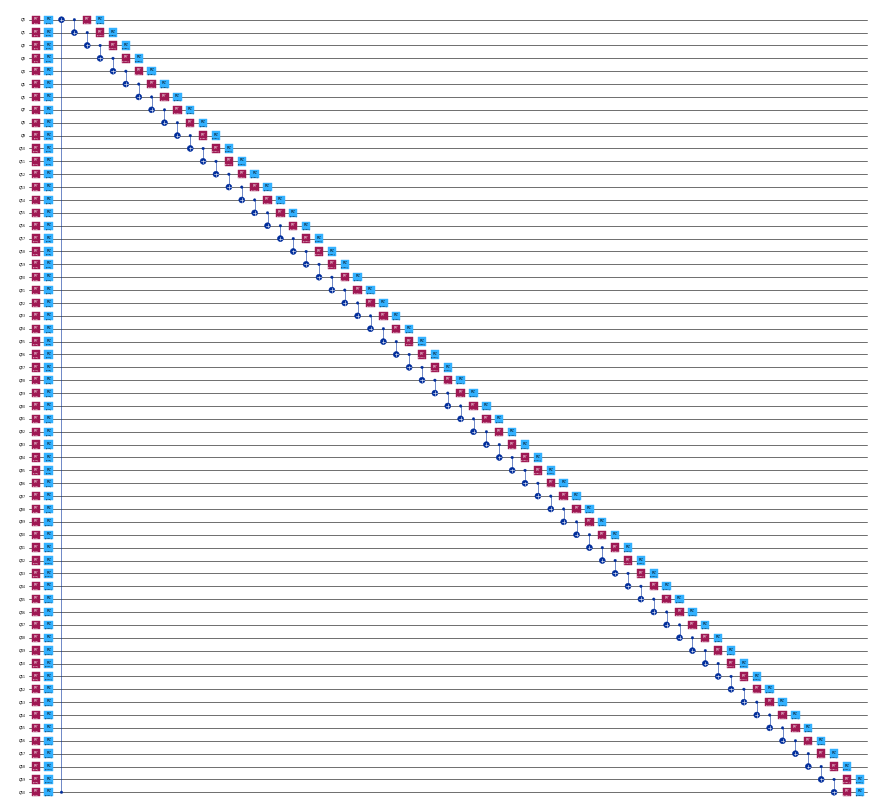

In [6]:
NUM_QUBITS = 61
circuit = EfficientSU2(NUM_QUBITS, entanglement="circular", reps=1).decompose()

print(f"Original circuit -> Depth: {circuit.depth()}, CNOTs: {circuit.num_nonlocal_gates()}")
circuit.draw(fold=-1, output="mpl", style="iqp", scale=0.2)

In [9]:
transpiler_ai_false = TranspilerService(
        backend_name="ibm_brisbane",
        ai="false",
        optimization_level=3,
)

transpiled_circuit = transpiler_ai_false.run(circuit)

INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


In [10]:
# Submit your answer using following code

grade_lab3_ait_ex1(transpiler_ai_false) # Expected result type: TranspilerService

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [11]:
circuit_ai_false = transpiler_ai_false.run(circuit)

INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Transpiled without AI -> Depth: 1105, CNOTs: 283


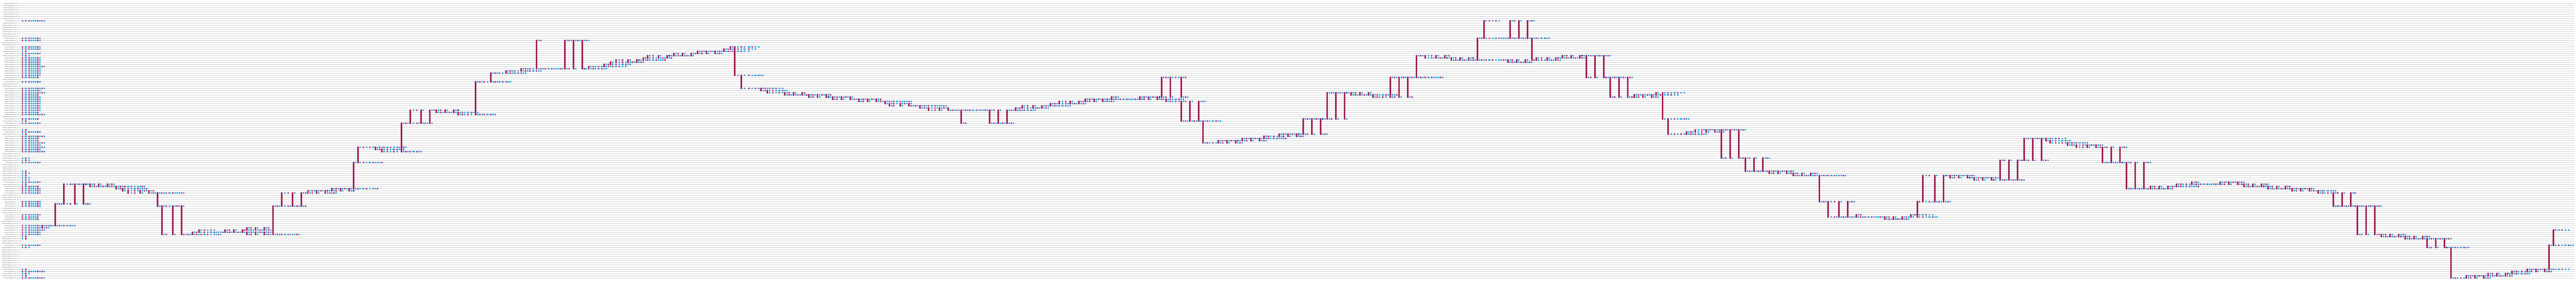

In [12]:
print(f"Transpiled without AI -> Depth: {circuit_ai_false.depth()}, CNOTs: {circuit_ai_false.num_nonlocal_gates()}")
circuit_ai_false.draw(fold=-1, output="mpl", scale=0.2)

In [13]:
transpiler_ai_true = TranspilerService(
        backend_name="ibm_brisbane",
        ai="true",
        optimization_level=3,
)

transpiled_circuit = transpiler_ai_true.run(circuit)

INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


In [14]:
# Submit your answer using following code

grade_lab3_ait_ex2(transpiler_ai_true) # Expected result type: TranspilerService

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [15]:
circuit_ai_true = transpiler_ai_true.run(circuit)

INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Transpiled with AI -> Depth: 275, CNOTs: 64


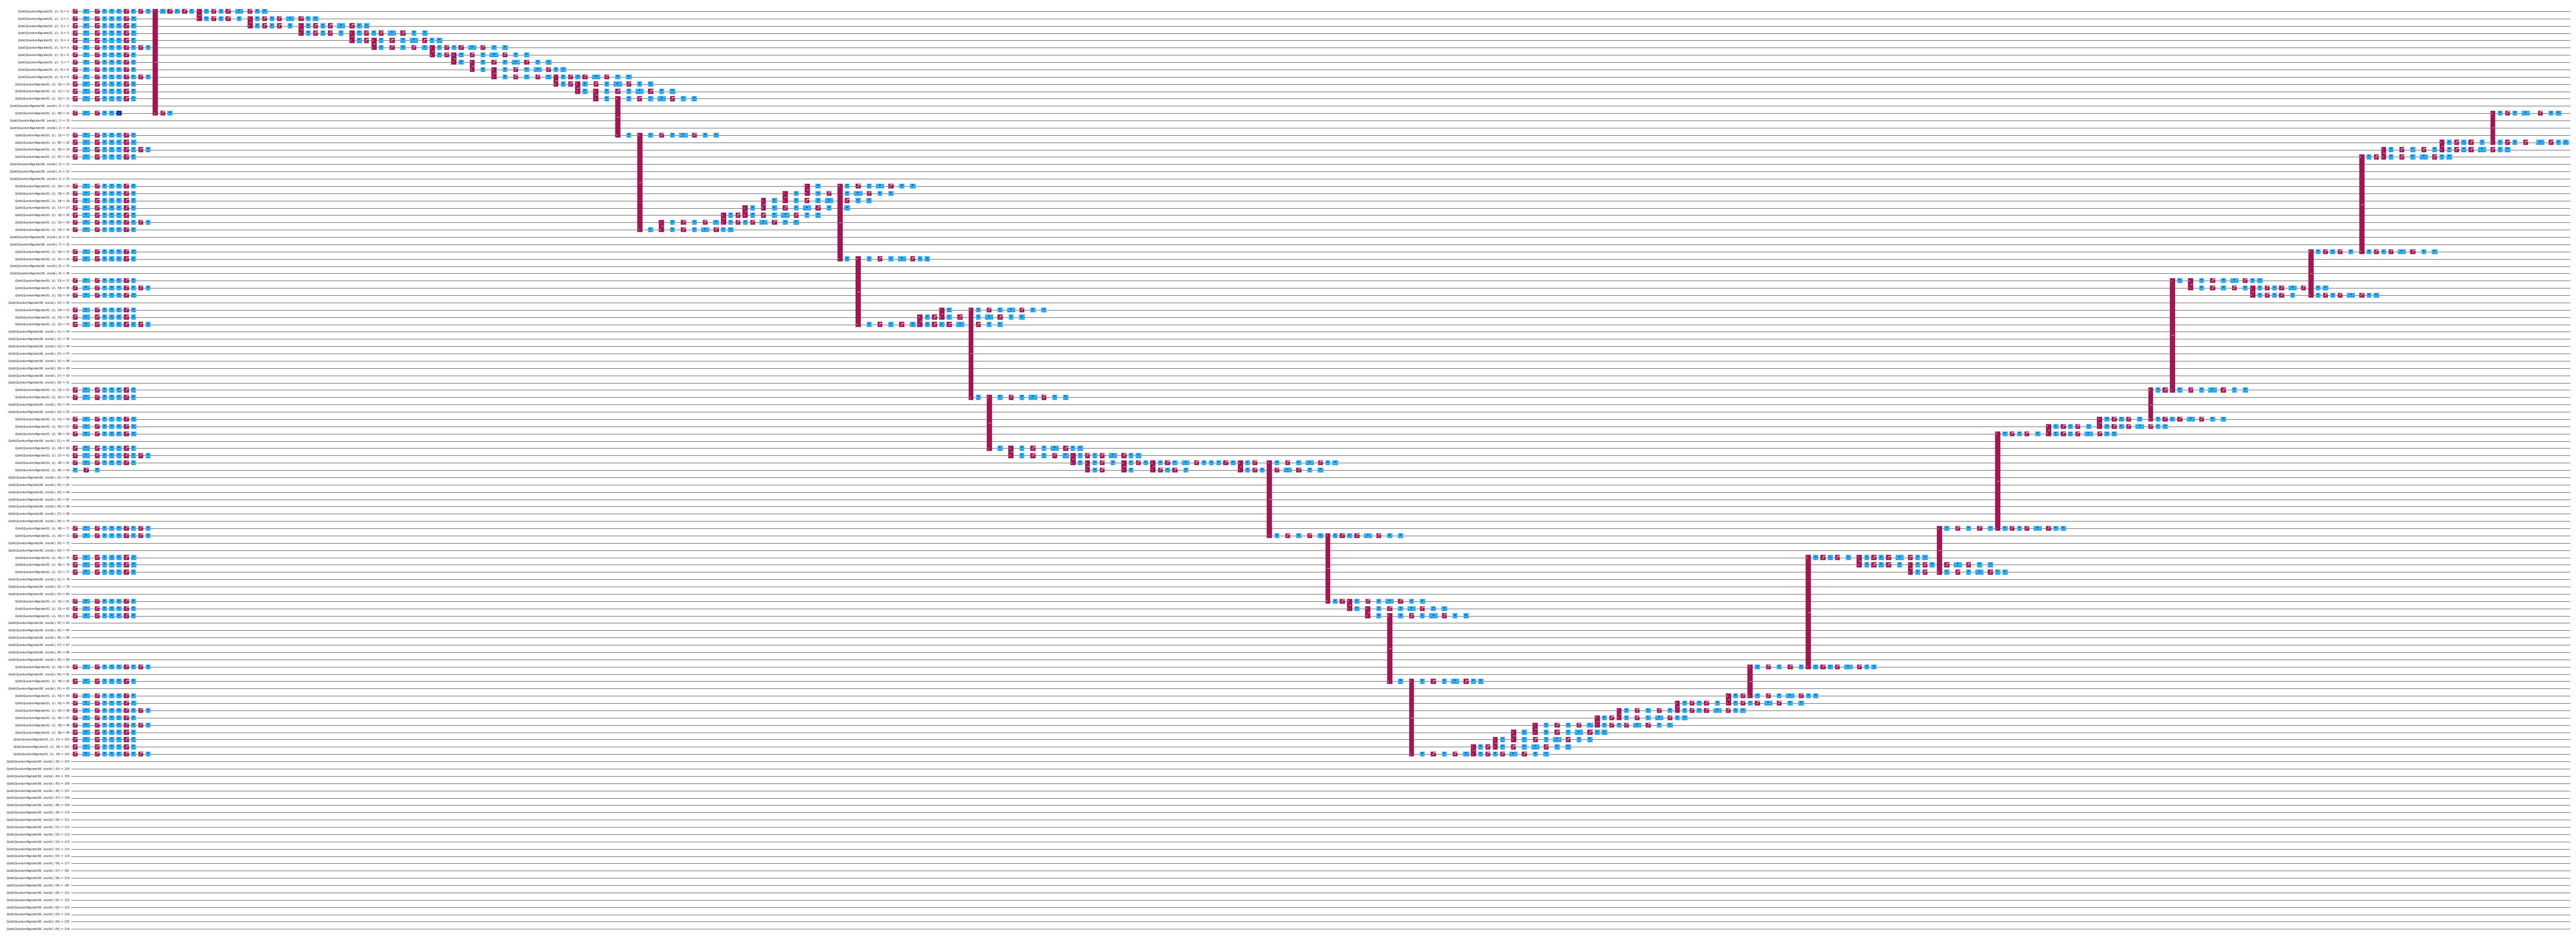

In [16]:
print(f"Transpiled with AI -> Depth: {circuit_ai_true.depth()}, CNOTs: {circuit_ai_true.num_nonlocal_gates()}")
circuit_ai_true.draw(fold=-1, output="mpl", scale=0.2)

In [17]:
# Transpiling locally using Qiskit SDK
service = QiskitRuntimeService()
backend = service.backend("ibm_sherbrooke")
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)

In [ ]:
# Run and compile results
num_qubits = [11, 21, 41, 61, 81]
num_cnots_local = []
num_cnots_with_ai = []
num_cnots_without_ai = []

for nq in num_qubits:
    circuit = EfficientSU2(nq, entanglement="circular", reps=1).decompose()

    # Using the Transpiler locally on Qiskit
    circuit_local = pm.run(circuit)
    # Using the transpiler service without AI
    circuit_without_ai = transpiler_ai_false.run(circuit)
    # Using the transpiler service with AI
    circuit_with_ai = transpiler_ai_true.run(circuit)

    num_cnots_local.append(circuit_local.num_nonlocal_gates())
    num_cnots_without_ai.append(circuit_without_ai.num_nonlocal_gates())
    num_cnots_with_ai.append(circuit_with_ai.num_nonlocal_gates())

INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_tr

In [ ]:
plt.plot(num_qubits, num_cnots_with_ai, '.-')
plt.plot(num_qubits, num_cnots_without_ai, '.-')
plt.plot(num_qubits, num_cnots_local, '--')
plt.xlabel("Number of qubits")
plt.ylabel("CNOT count")
plt.legend(["Qiskit Transpiler Service with AI", "Qiskit Transpiler Service without AI", "Qiskit SDK"])